In [2]:
import pandas as pd

In [4]:
file_name = "1553768847-housing.csv"
dataset = pd.read_csv(file_name)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [30]:
#handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
dataset['total_bedrooms'] = imputer.fit_transform(dataset[['total_bedrooms']])

In [32]:
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [40]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['ocean_proximity'] = label_encoder.fit_transform(dataset['ocean_proximity'])
dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500


In [41]:
dataset['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [43]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'])
scaled_features_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.291089


In [65]:
# Concatenate the scaled features with the target variable
data_scaled = pd.concat([scaled_features_df, dataset[['median_house_value']]], axis=1)
data_scaled.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,1.291089,452600
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.291089,358500


In [66]:
# Split the data
from sklearn.model_selection import train_test_split

columns = dataset.columns.tolist()

X = data_scaled.drop('median_house_value', axis=1)
y = data_scaled[['median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

x_columns = X.columns.tolist()
y_columns = y.columns.tolist()

In [67]:
%%time
# Train a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model

CPU times: total: 62.5 ms
Wall time: 20 ms


LinearRegression()

In [68]:
# Evaluate the model (Cross-validation)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# RMSE
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Cross-validation (RMSE)
cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
print(f'Cross-validation RMSE: {cv_rmse.mean()}')

# Cross-validation (MAE)
cv_mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=5)
print(f'Cross-validation MAE: {cv_mae.mean()}')

c:\Users\admin\anaconda3\envs\py312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\admin\anaconda3\envs\py312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 70289.95046980408
RMSE: 70289.95046980408
MAE: 51403.86129560292
Cross-validation RMSE: 72192.77629370624
Cross-validation MAE: 53238.54892113431


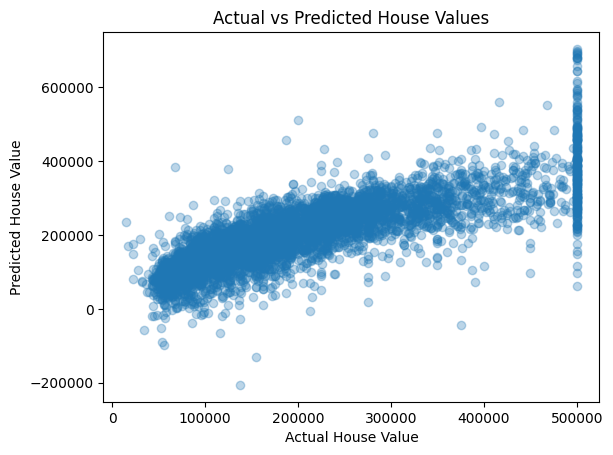

In [69]:
# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.show()

In [74]:
from sklearn.metrics import  r2_score

# Apply log transformation to target variable
dataset['log_median_house_value'] = np.log(dataset['median_house_value'] + 1)  # Adding 1 to handle zero values

# Combine scaled features with the transformed target variable
dataset_scaled = pd.concat([scaled_features_df, dataset[['log_median_house_value']]], axis=1)

# Split the dataset
X = dataset_scaled.drop('log_median_house_value', axis=1)
y = dataset_scaled['log_median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and revert the transformation
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log) - 1  # Inverse log transformation

# Actual values
y_test_actual = np.exp(y_test) - 1

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

RMSE: 93695.20939735419
MAE: 53334.915605126596
R-squared: 0.33007233544761294


Linear regression - RMSE: 93695.20939735457
Linear regression - MAE: 53334.91560512666
Linear regression - R-squared: 0.3300723354476076


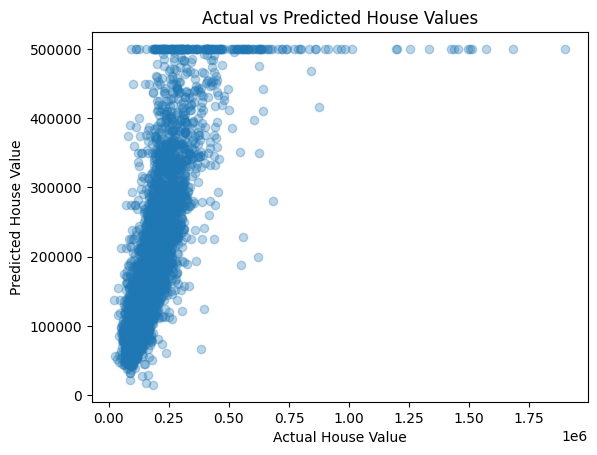

Decision Tree - RMSE: 69015.74024278231
Decision Tree - MAE: 43281.75823643416
Decision Tree - R-squared: 0.6365125330831208


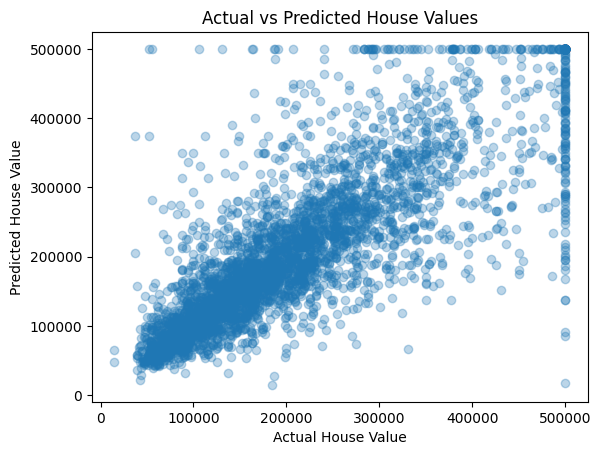

Random Forest - RMSE: 50529.76027505314
Random Forest - MAE: 31240.07370614509
Random Forest - R-squared: 0.8051557402421154


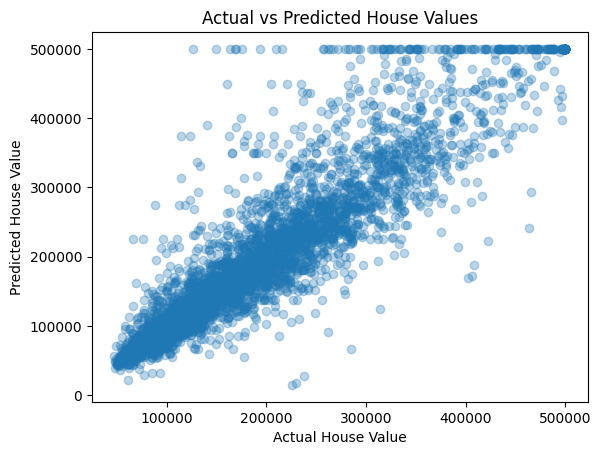

Gradient Boosting - RMSE: 58834.788638986436
Gradient Boosting - MAE: 38876.06692837098
Gradient Boosting - R-squared: 0.7358433579384513


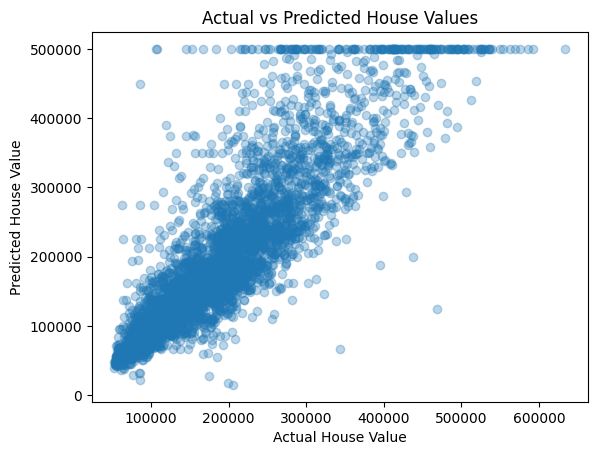

In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess data
data = pd.read_csv('1553768847-housing.csv')

# Handle missing values
imputer = SimpleImputer(strategy='median')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

# Encode categorical variables
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])

# Prepare target variable
data['log_median_house_value'] = np.log(data['median_house_value'] + 1)
data_scaled = pd.concat([scaled_features_df, data[['log_median_house_value','ocean_proximity']]], axis=1)

# Split data
X = data_scaled.drop('log_median_house_value', axis=1)
y = data_scaled['log_median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear regression':LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.exp(y_pred_log) - 1
    y_test_actual = np.exp(y_test) - 1

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    mae = mean_absolute_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)
    
    print(f'{name} - RMSE: {rmse}')
    print(f'{name} - MAE: {mae}')
    print(f'{name} - R-squared: {r2}')
    
    plt.scatter(y_pred, y_test_actual, alpha=0.3)
    plt.xlabel("Actual House Value")
    plt.ylabel("Predicted House Value")
    plt.title("Actual vs Predicted House Values")
    plt.show()


Linear regression - RMSE: 70247.04105230642
Linear regression - MAE: 51424.585811166005
Linear regression - R-squared: 0.6270723051413785


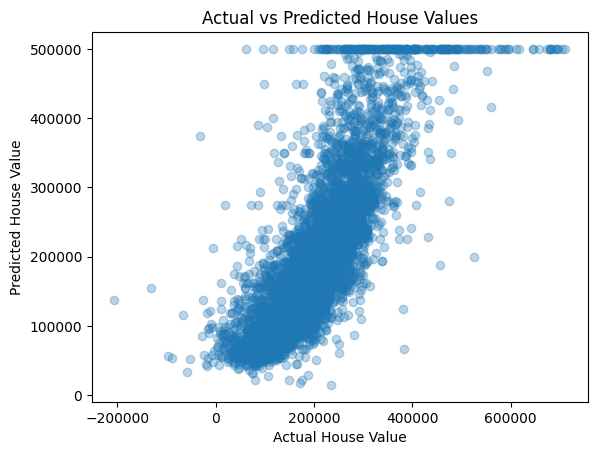

Decision Tree - RMSE: 66786.55206977959
Decision Tree - MAE: 42521.342248062014
Decision Tree - R-squared: 0.662909423563075


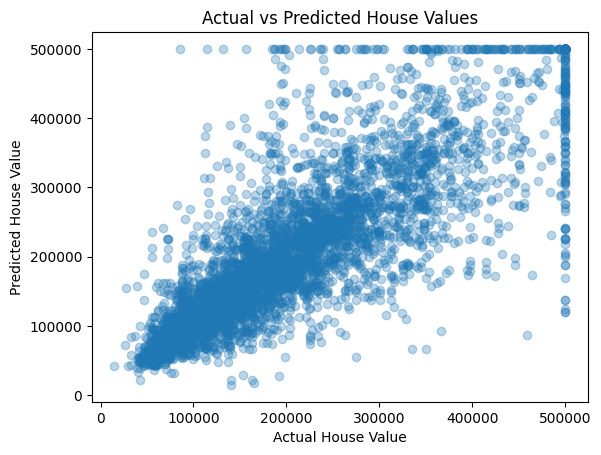

Random Forest - RMSE: 50241.98050447027
Random Forest - MAE: 32262.220282945735
Random Forest - R-squared: 0.8092335197320086


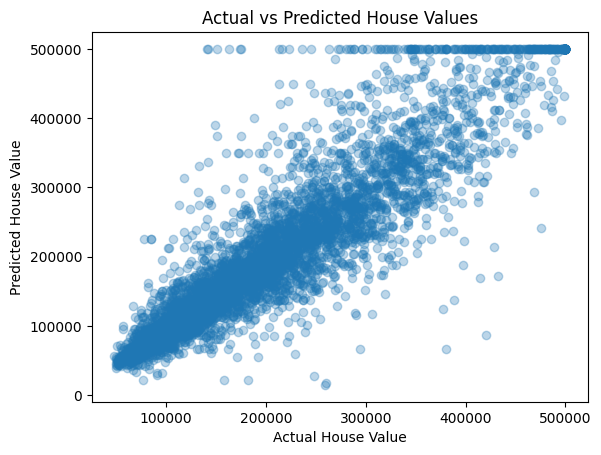

Gradient Boosting - RMSE: 56112.679365099015
Gradient Boosting - MAE: 38853.892329423325
Gradient Boosting - R-squared: 0.7620473318918842


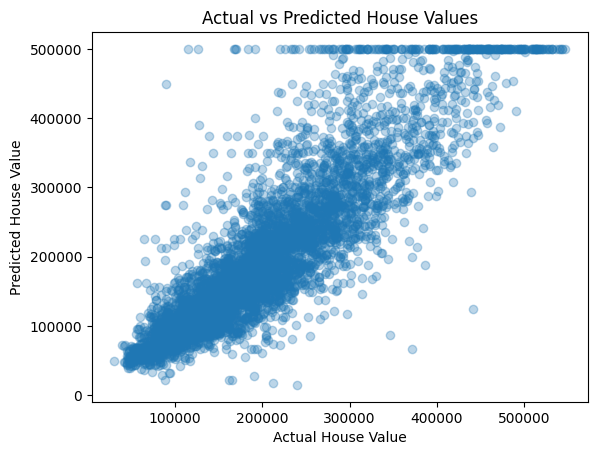

In [201]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess data
data = pd.read_csv('1553768847-housing.csv')

# Handle missing values
imputer = SimpleImputer(strategy='median')
# imputer = SimpleImputer(fill_value=0)
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

# Encode categorical variables
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity'])

# Split data
X = scaled_features_df
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define models
models = {
    'Linear regression':LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name} - RMSE: {rmse}')
    print(f'{name} - MAE: {mae}')
    print(f'{name} - R-squared: {r2}')
    
    plt.scatter(y_pred, y_test, alpha=0.3)
    plt.xlabel("Actual House Value")
    plt.ylabel("Predicted House Value")
    plt.title("Actual vs Predicted House Values")
    plt.show()


In [193]:
LR = models['Linear regression']
DT = models['Decision Tree']
RF = models['Random Forest']
GB = models['Gradient Boosting']

In [203]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,0.279366,0.200449,-0.289187,-0.518327,2.711630e-16,-0.029562,-0.367597,-1.152489,-0.116739
3024,0.054757,-0.230283,0.108104,0.140833,2.711630e-16,0.123206,0.220915,-0.705015,-0.116739
15663,-1.432653,1.015093,1.856182,0.547423,2.711630e-16,-0.101972,1.212230,-0.205588,1.291089
20484,0.424114,-0.632923,-0.924851,0.190339,2.711630e-16,0.246834,-0.011874,0.982710,-0.820653
9814,-1.178096,0.462633,0.425936,-0.130532,2.711630e-16,-0.320086,-0.187120,-0.076678,1.995003
...,...,...,...,...,...,...,...,...,...
5363,0.573853,-0.745288,1.776723,-0.302885,-4.528745e-01,-0.577938,-0.372828,1.450344,-0.820653
19755,-1.317853,2.129377,0.108104,-0.867160,-9.108281e-01,-0.896720,-0.875024,-0.884773,-0.116739
4885,0.653714,-0.754652,0.664310,-0.497241,-8.794272e-02,0.660103,-0.066802,-0.896933,-0.820653
13043,-0.743852,1.347506,-1.798890,1.942295,1.004467e+00,0.819935,1.128530,1.587676,-0.116739


In [217]:
pd.DataFrame(y_test)

,median_house_value
20046,47700
3024,45800
15663,500001
20484,218600
9814,278000
...,...
5363,500001
19755,63200
4885,117700
13043,263100


In [179]:
dataset.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,log_median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600,13.022766


In [180]:
data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600


In [222]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [224]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [232]:
# Make prediction
index = 8583

for name, model in models.items():
    y_pred = model.predict(pd.DataFrame(X_test.loc[index]).T)
    print(f'Predicted value for {name} : {y_pred}')
print(f'Actual value for {pd.DataFrame(y_test).loc[index]}')

Predicted value for Linear regression : [351867.37748298]
Predicted value for Decision Tree : [405800.]
Predicted value for Random Forest : [437112.37]
Predicted value for Gradient Boosting : [434407.42381775]
Actual value for median_house_value    481500
Name: 8583, dtype: int64


In [220]:
# y_test['median_house_value'].loc[19755]


median_house_value    47700
Name: 20046, dtype: int64

In [187]:
single_row = pd.DataFrame(data.iloc[19755])
single_row.T

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19755,-122.21,40.18,30.0,744.0,156.0,410.0,165.0,2.1898,1.0,63200.0
